# Tests SLP

In [1]:
from FHDpy.SLP import SLP

In [2]:
'''
Genrate SLPs
'''
import random 

def generate_exponential(size, dummy = True):
    '''
    Generates a compressed SLP of exponential lenght on its size, given by the number of assignments of form
    
    ['x',#0.#0, #1.#1,...,#n-1.c.#n-1]
    
    where c is either 'y' or '', depending on the parameter dummy.
    
    Parameters
    ----------
    size : int
    Measures the number of assignments of this SLP. Note that len(SLP) >= 2**(size-1).
    dummy : bool
    If True, c = 'y', otherwise c = ''.
    
    Returns
    -------
    slp : SLP
    Compressed SLP for 'x.x.x....x.c.x.x....x', where each string of 'x' has length 2**size.
    sequence : str
    Final sequence 'x.x.x....x.c.x.x....x'. 
    '''
    slp = ['x' if i == 0 else '#' + str(i-1) + '.#' + str(i-1) for i in range(size-1)]
    slp.append('#' + str(size - 2) + '.y.#' + str(size -2)) if dummy else '#' + str(size - 2) + '.#' + str(size -2)
    
    sequence =  int(2**(size - 2))*'x.' +  'y.' + int(2**(size - 2))*'x.' if dummy else int(2**(size - 1))*'x.' 
    sequence = sequence[:-1]
    
    return SLP(slp), sequence

def generate_signed_exponential(size, dummy = True):
    '''
    Generates a compressed SLP of exponential lenght on its size, given by the number of assignments of form
    
    ['x',#0.#0, #1.#1,...,#n-1.c.#n-1*]
    
    where c is either 'y' or '', depending on the parameter dummy.
    
    Parameters
    ----------
    size : int
    Measures the number of assignments of this SLP. Note that len(SLP) >= 2**(size-1).
    dummy : bool
    If True, c = 'y', otherwise c = ''.
    
    Returns
    -------
    slp : SLP
    Compressed SLP for 'x.x.x....x.c.x*.x*....x*', where each string of 'x' has length 2**size.
    sequence : str
    Final sequence 'x.x.x....x.c.x*.x*....x*'. 
    '''
    
    slp = ['x' if i == 0 else '#' + str(i-1) + '.#' + str(i-1) for i in range(size-1)]
    slp.append('#' + str(size - 2) + '.y.#' + str(size -2) +'*') if dummy else '#' + str(size - 2) + '.#' + str(size -2) +'*'
    
    sequence =  int(2**(size - 2))*'x.' +  'y.' + int(2**(size - 2))*'x*.' if dummy else int(2**(size - 2))*'x.' + int(2**(size - 2))*'x*.'
    sequence = sequence[:-1]
    
    return SLP(slp), sequence

def generate_random_slp(size, alphabet = ['x'], signed = True):
    '''
    Generates a random (almost) binary SLP over some alphabet.
    
    Parameters
    ----------
    size : int
    Number os assignments of the generated SLP.
    alphabet : list
    List of simple symbols (strings) used to generate the SLP. Symbols will be necessarily added to the SLP.
    signed : bool Parameters
    If True, it adds some random signs assingnments (but the SLP is not really binary anymore).
    
    Returns
    -------
    slp : SLP
    Random SLP, whose first len(alphabet) assignments are simple symbols and the rest are proper assignments.    
    '''
    slp = [symbol for symbol in alphabet] # Include the alphabet as part of the SLP.
    assignments = ['#' + str(i) for i in range(len(alphabet))] # Make list containing assignments for each simple symbol for later reference.
    
    while len(slp) < size:
        if signed: # If signed, we randomly add negatives to proper assignments.
            sign1 = random.choice(['*',''])
            sign2 = random.choice(['*',''])
        else:
            sign1 = ''
            sign2 = ''
        slp.append(random.choice(assignments) + sign1 + '.' + random.choice(assignments) + sign2) # Make two random proper assignment of previous assignments.
        assignments.append('#' + str(len(assignments))) # Update the list of possible assignments.
    
    return SLP(slp)

In [3]:
slp, sequence = generate_exponential(4)
slp.get_uncompressed(inplace = True)
assert slp.list_form[-1] == sequence

slp, sequence = generate_signed_exponential(4)
slp.get_uncompressed(inplace = True)
assert slp.list_form[-1] == sequence

In [4]:
'''
Test of SLP modules
'''

def test_substitute(list_form, replaced = 'x', replacement = 't', verbose = True):
    '''
    Test if subsititute module is working well.
    
    Parameters
    ----------
    list_form : list
    List form of the SLP (list of strings).
    replaced : str
    Value to be replaced.
    replacement : str
    Substitution value.
    verbose : bool
    If True, prints the SLPs.
    
    Returns
    -------
    None    
    '''
    original =  SLP(list_form)
    binary = original.get_binary()
    uncompressed = original.get_uncompressed()
    
    sequence = uncompressed.list_form[-1]
    new_sequence = ''
    
    if type(replacement) == str:
        for symbol_sequence in sequence.split('.'):
            if symbol_sequence == replaced:
                new_sequence += replacement + '.'
            elif symbol_sequence[:-1] == replaced:
                for symbol_replacement in replacement.split('.')[::-1]:
                    new_sequence += symbol_replacement + '*.' if symbol_replacement[-1] != '*' else symbol_replacement[:-1] + '.'
            else:
                new_sequence += symbol_sequence + '.'
    sequence = new_sequence[:-1]
        
    original = original.substitute(replaced, replacement)
    binary = binary.substitute(replaced, replacement)
    uncompressed = uncompressed.substitute(replaced, replacement)
    
    if type(replacement) != str:
        sequence = uncompressed.get_uncompressed().list_form[-1]
    
    if (sequence != original.get_uncompressed().list_form[-1]) or (sequence != binary.get_uncompressed().list_form[-1]) or (sequence != uncompressed.get_uncompressed().list_form[-1]):
        print('Sequence:\n', sequence, '\n')
        print('Original:')
        print(original.get_uncompressed())
        print('\n')
        print('Binary:')
        print(binary.get_uncompressed())
        print('\n')
        print('Uncompressed:')
        print(uncompressed.get_uncompressed())
        raise ValueError('Implementation mistake in substitute!')
    
    if verbose:
        print('Sequence:\n', sequence, '\n')
        print('Original:')
        print(original)
        print('\n')
        print('Binary:')
        print(binary)
        print('\n')
        print('Uncompressed:')
        print(uncompressed.get_uncompressed())
    return None

def test_count(list_form, symbol = None, verbose = True):
    '''
    Test if count module is working well.
    
    Parameters
    ----------
    list_form : list
    List form of the SLP (list of strings).
    symbol : str
    Symbol to be counted.
    verbose : bool
    If True, prints the counted values and the SLPs.
    
    Returns
    -------
    None  
    '''
    original =  SLP(list_form)
    original_length = len(original)
    
    binary =  original.get_binary()
    binary_length = len(binary)
    
    uncompressed = original.get_uncompressed()
    uncompressed_length = len(uncompressed)
    
    if (binary_length != original_length) or (uncompressed_length != original_length):
        raise ValueError('Implementation mistake in length!')
    
    if symbol != None:
        if (binary.count(symbol) != original.count(symbol)) or (uncompressed.count(symbol) != original.count(symbol)):
                    print('Count original: ', original.count(symbol))
                    print('Count binary: ', binary.count(symbol))
                    print('Count uncompressed: ', uncompressed.count(uncompressed))
                    raise ValueError('Implementation mistake in count!')
    
    if verbose:
        print('Original: ')
        print(original)
        print('Lenght: ', len(original))
        print('Complexity: ', original.complexity())
        print('\n')
        print('Binary: ')
        print(binary)
        print('Lenght: ', len(binary))
        print('Complexity: ', binary.complexity())
        print('\n')
        print('Uncompressed: ')
        print(uncompressed)
        print('Lenght: ', len(uncompressed))
        print('Complexity: ', uncompressed.complexity())
        print('\n\n')

    
    return None

def test_signed_count(list_form, symbol = None, verbose = True):
    '''
    Test if signed count module is working well.
    
    Parameters
    ----------
    list_form : list
    List form of the SLP (list of strings).
    symbol : str
    Symbol to be counted.
    verbose : bool
    If True, prints the counted values and the SLPs.
    
    Returns
    -------
    None  
    '''
    original =  SLP(list_form)
    original_length = len(original)
    
    binary =  original.get_binary()
    binary_length = len(binary)
    
    uncompressed = original.get_uncompressed()
    uncompressed_length = len(uncompressed)
    
    if (binary_length != original_length) or (uncompressed_length != original_length):
        raise ValueError('Implementation mistake in length!')
    
    if symbol != None:
        if (binary.signed_count(symbol) != original.signed_count(symbol)) or (uncompressed.signed_count(symbol) != original.signed_count(symbol)):
                    print('Count original: ', original.signed_count(symbol))
                    print('Count binary: ', binary.signed_count(symbol))
                    print('Count uncompressed: ', uncompressed.signed_count(uncompressed))
                    raise ValueError('Implementation mistake in count!')
    
    if verbose:
        print('Original: ')
        print(original)
        print('Lenght: ', len(original))
        print('Complexity: ', original.complexity())
        print('\n')
        print('Binary: ')
        print(binary)
        print('Lenght: ', len(binary))
        print('Complexity: ', binary.complexity())
        print('\n')
        print('Uncompressed: ')
        print(uncompressed)
        print('Lenght: ', len(uncompressed))
        print('Complexity: ', uncompressed.complexity())
        print('\n\n')
    
    return None

def test_conversions(list_form, verbose = True):
    '''
    Test if conversions are working well by comparing uncompressed versions.
    
    Parameters
    ----------
    list_form : list
    List form of the SLP (list of strings).
    verbose : bool
    If True, prints the uncompressed SLPs.
    
    Returns
    -------
    None  
    '''
    original =  SLP(list_form)
    binary =  original.get_binary()
    uncompressed_original = original.get_uncompressed()
    uncompressed_binary = binary.get_uncompressed()
    
    if verbose:
        print('Original: ', uncompressed_original.list_form[-1])
        print('\n')
        print('Binary: ', uncompressed_binary.list_form[-1])
        print('\n\n')
     
    if uncompressed_original.list_form[-1] != uncompressed_binary.list_form[-1]:
        print('Original: ', uncompressed_original.list_form[-1])
        print('Binary: ', uncompressed_binary.list_form[-1])
        raise ValueError('Implementation error!')

In [5]:
for slp in [['x','y', '#0*.y*.#0', '#2.#2*','z.#3.#1'], generate_exponential(12)[0].list_form, generate_signed_exponential(12)[0].list_form, generate_random_slp(4).list_form]:
    verbose = False
    test_substitute(slp, verbose = verbose)
    test_substitute(slp, replacement = 'x.y', verbose = verbose)
    test_substitute(slp, replacement = 'x.x*', verbose = verbose)
    test_substitute(slp, replacement = SLP(['x','x*','#0.#1*']), verbose = verbose)

    test_count(slp, symbol = 'x', verbose = verbose)
    test_signed_count(slp, symbol = 'x.t', verbose = verbose)
    test_conversions(slp, verbose = verbose)

In [6]:
import matplotlib.pyplot as plt
import time

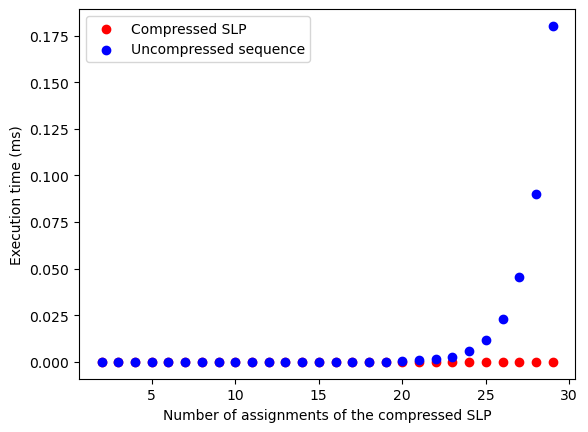

In [7]:
time_slp = []
time_sequence = []
max_complexity = 30
    
for complexity in range(2,max_complexity):
    slp, sequence = generate_exponential(complexity, dummy = False)
    start = time.time()
    slp.count('x')
    end = time.time()
    time_slp.append(end-start)
    
    start = time.time()
    sequence.count('x')
    end = time.time()
    time_sequence.append(end-start)

plt.scatter(range(2,max_complexity), time_slp, c = 'r', label = 'Compressed SLP')
plt.scatter(range(2,max_complexity), time_sequence, c = 'b', label = 'Uncompressed sequence')
plt.legend()
plt.xlabel("Number of assignments of the compressed SLP")
plt.ylabel("Execution time (ms)")
plt.show()

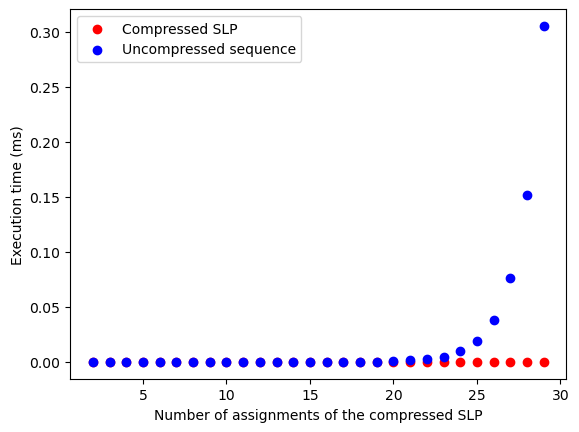

In [8]:
time_slp = []
time_sequence = []
max_complexity = 30
    
for complexity in range(2,max_complexity):
    slp, sequence = generate_signed_exponential(complexity, dummy = False)
    start = time.time()
    slp.signed_count('x*')
    end = time.time()
    time_slp.append(end-start)
    
    start = time.time()
    sequence.count('x*')
    end = time.time()
    time_sequence.append(end-start)

plt.scatter(range(2,max_complexity), time_slp, c = 'r', label = 'Compressed SLP')
plt.scatter(range(2,max_complexity), time_sequence, c = 'b', label = 'Uncompressed sequence')
plt.legend()
plt.xlabel("Number of assignments of the compressed SLP")
plt.ylabel("Execution time (ms)")
plt.show()

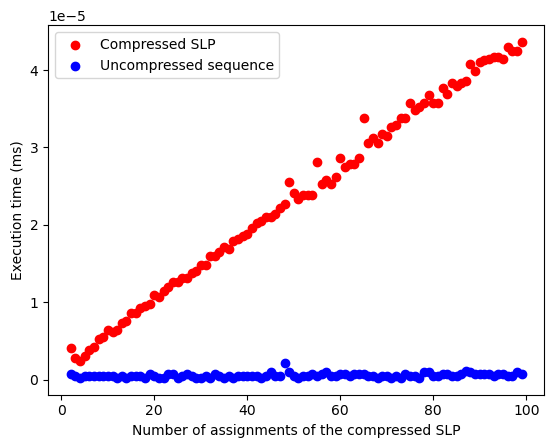

In [9]:
time_slp = []
time_sequence = []
max_complexity = 100
    
for complexity in range(2,max_complexity):
    slp = generate_random_slp(complexity)
    start = time.time()
    slp.count('x')
    end = time.time()
    time_slp.append(end-start)
    
    slp.get_uncompressed(inplace = True)
    start = time.time()
    slp.count('x')
    end = time.time()
    time_sequence.append(end-start)

plt.scatter(range(2,max_complexity), time_slp, c = 'r', label = 'Compressed SLP')
plt.scatter(range(2,max_complexity), time_sequence, c = 'b', label = 'Uncompressed sequence')
plt.legend()
plt.xlabel("Number of assignments of the compressed SLP")
plt.ylabel("Execution time (ms)")
plt.show()